In [141]:
import numpy as np
import matplotlib.pyplot as plt

from copy import deepcopy
from data import exemplars_v2, load_noisy_data

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [142]:
exemplars = exemplars_v2

# Visualize Data

### Load exemplars and visualize

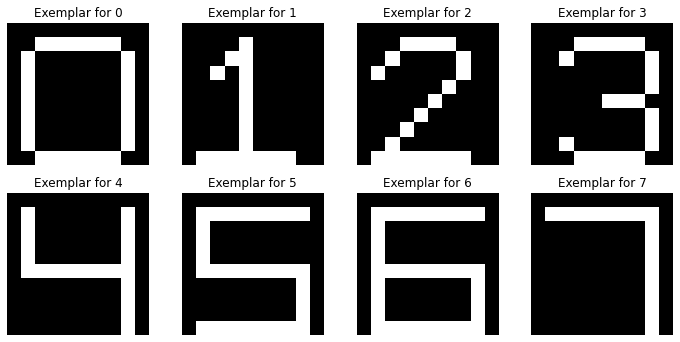

In [143]:
plt.figure(1, figsize=(12,12))
for i in range(len(exemplars)):
    exemplar = exemplars[i].reshape(10, 10)
    plt.subplot(4, 4, i+1)
    plt.imshow(exemplar, cmap='gray')
    plt.title(f'Exemplar for {i}')
    plt.axis('off')

### Load noisy data and visualize

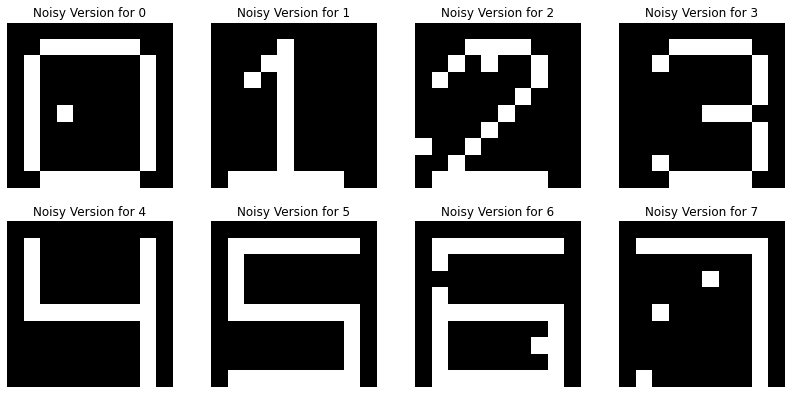

In [155]:
noisy_data = load_noisy_data(threshold=0.99)

plt.figure(1, figsize=(14,14))
for i in range(len(noisy_data)):
    noisy = noisy_data[i].reshape(10, 10)
    plt.subplot(4, 4, i+1)
    plt.title(f'Noisy Version for {i}')
    plt.imshow(noisy, cmap='gray')
    plt.axis('off')

# Create Hopfield Network

In [211]:
class HopfieldNetwork:
    def __init__(self):
        pass

    def train(self, exemplars):
        n = len(exemplars[0])
        W = np.zeros((n,n))

        for exemplar in exemplars:
            W_delta_tilda = np.outer(exemplar, exemplar.T)
            W_delta = np.subtract(W_delta_tilda, np.identity(n))
            W_new = np.add(W, W_delta)
            W = deepcopy(W_new)
        
        self.W = W
    
    def hard_limiting(self, x):
        if x >= 0: 
            return 1
        else: 
            return -1

    def asynchronous_update(self, input):
        n, _ = self.W.shape 
        
        new_input = deepcopy(input)
        for i in range(n):
            new_input[i] = self.hard_limiting(np.dot(self.W[i], new_input))
        
        return new_input

    def recall(self, input, iters=10):
        new_input = deepcopy(input)
        for _ in range(iters):
            new_input = self.asynchronous_update(new_input)
                    
        return new_input

In [212]:
# Unit Test train
lecture_exemplars = [
    np.array([
        [ 1, -1, -1],
        [-1,  1, -1],
        [-1, -1,  1]
    ]).flatten(),
    np.array([
        [-1, -1, -1],
        [ 1,  1,  1],
        [-1, -1, -1]
    ]).flatten(),
    np.array([
        [-1, -1,  1],
        [-1, -1,  1],
        [-1, -1,  1]
    ]).flatten()
]

test_hn = HopfieldNetwork()

test_hn.train([lecture_exemplars[0]])
assert np.array_equal(test_hn.W, [
    [ 0., -1., -1., -1.,  1., -1., -1., -1.,  1.],
    [-1.,  0.,  1.,  1., -1.,  1.,  1.,  1., -1.],
    [-1.,  1.,  0.,  1., -1.,  1.,  1.,  1., -1.],
    [-1.,  1.,  1.,  0., -1.,  1.,  1.,  1., -1.],
    [ 1., -1., -1., -1.,  0., -1., -1., -1.,  1.],
    [-1.,  1.,  1.,  1., -1.,  0.,  1.,  1., -1.],
    [-1.,  1.,  1.,  1., -1.,  1.,  0.,  1., -1.],
    [-1.,  1.,  1.,  1., -1.,  1.,  1.,  0., -1.],
    [ 1., -1., -1., -1.,  1., -1., -1., -1.,  0.]
])

test_hn.train(lecture_exemplars[:2])
assert np.array_equal(test_hn.W, [
    [ 0.,  0.,  0., -2.,  0., -2.,  0.,  0.,  2.],
    [ 0.,  0.,  2.,  0., -2.,  0.,  2.,  2.,  0.],
    [ 0.,  2.,  0.,  0., -2.,  0.,  2.,  2.,  0.],
    [-2.,  0.,  0.,  0.,  0.,  2.,  0.,  0., -2.],
    [ 0., -2., -2.,  0.,  0.,  0., -2., -2.,  0.],
    [-2.,  0.,  0.,  2.,  0.,  0.,  0.,  0., -2.],
    [ 0.,  2.,  2.,  0., -2.,  0.,  0.,  2.,  0.],
    [ 0.,  2.,  2.,  0., -2.,  0.,  2.,  0.,  0.],
    [ 2.,  0.,  0., -2.,  0., -2.,  0.,  0.,  0.]
])

test_hn.train(lecture_exemplars)
assert np.array_equal(test_hn.W, [
    [ 0.,  1., -1., -1.,  1., -3.,  1.,  1.,  1.],
    [ 1.,  0.,  1.,  1., -1., -1.,  3.,  3., -1.],
    [-1.,  1.,  0., -1., -3.,  1.,  1.,  1.,  1.],
    [-1.,  1., -1.,  0.,  1.,  1.,  1.,  1., -3.],
    [ 1., -1., -3.,  1.,  0., -1., -1., -1., -1.],
    [-3., -1.,  1.,  1., -1.,  0., -1., -1., -1.],
    [ 1.,  3.,  1.,  1., -1., -1.,  0.,  3., -1.],
    [ 1.,  3.,  1.,  1., -1., -1.,  3.,  0., -1.],
    [ 1., -1.,  1., -3., -1., -1., -1., -1.,  0.]
])

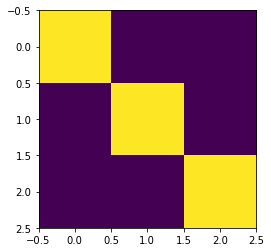

In [215]:
test_hn = HopfieldNetwork()
test_hn.train(lecture_exemplars)
test_noisy = np.array([
    [1, -1,  -1],
    [1, -1,  -1],
    [-1, -1,  1]
]).flatten()


plt.imshow(test_hn.recall(test_noisy, iters=1).reshape(3, 3))

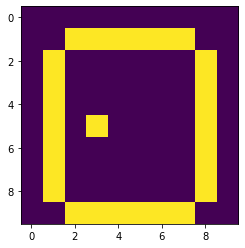

In [216]:
plt.imshow(noisy_data[0].reshape(10, 10))

In [217]:
len(exemplars[0:3])

3

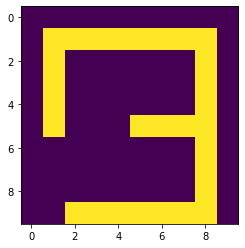

In [221]:
hn = HopfieldNetwork()
hn.train(exemplars)
plt.imshow(hn.recall(noisy_data[0], iters=3).reshape(10, 10))

In [41]:
hn.forward_pass(noisy_data[0], iters=3)

Updated value = -1
Updated value = -1
Updated value = -1
Updated value = -1
Updated value = -1
Updated value = -1
Updated value = -1
Updated value = -1
Updated value = -1
Updated value = -1
Updated value = -1
Updated value = 1
Previous value = -1 | Updated value = 1
Updated value = 1
Updated value = 1
Updated value = 1
Updated value = 1
Updated value = 1
Updated value = 1
Updated value = 1
Previous value = -1 | Updated value = 1
Updated value = -1
Updated value = -1
Updated value = 1
Updated value = -1
Updated value = -1
Updated value = -1
Updated value = -1
Updated value = -1
Updated value = -1
Updated value = 1
Updated value = -1
Updated value = -1
Updated value = 1
Updated value = -1
Updated value = -1
Updated value = -1
Updated value = -1
Updated value = -1
Updated value = -1
Updated value = 1
Updated value = -1
Updated value = -1
Updated value = 1
Updated value = -1
Updated value = -1
Updated value = -1
Updated value = -1
Updated value = -1
Updated value = -1
Updated value = 1
Upd

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1])

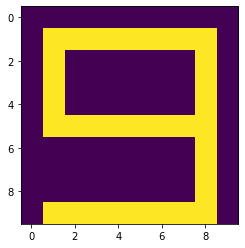

In [23]:
plt.imshow(hn.forward_pass(noisy_data[0], iters=1).reshape(10, 10))